In [ ]:
!pip install librosa soundfile numpy scikit-learn tensorflow matplotlib seaborn
print("All required libraries installed!")

All required libraries installed!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive mounted successfully!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully!


In [ ]:
import zipfile
import os
import shutil # Import shutil for robust directory removal

print("--- Step 3: Data Extraction ---")


speech_zip = "/content/drive/MyDrive/emotion_audio/Audio_Speech_Actors_01-24.zip"
song_zip = "/content/drive/MyDrive/emotion_audio/Audio_Song_Actors_01-24.zip"

# Example if your zips are in My Drive/My_Project_Data/Audio_Emotions/
# speech_zip = "/content/drive/MyDrive/My_Project_Data/Audio_Emotions/Audio_Speech_Actors_01-24.zip"
# song_zip = "/content/drive/MyDrive/My_Project_Data/Audio_Emotions/Audio_Song_Actors_01-24.zip"

# Define directories where the audio files will be extracted inside Colab
speech_extract_dir = "/content/speech_data" # Using a new, distinct name
song_extract_dir = "/content/song_data"    # Using a new, distinct name

# --- Cleanup previous extractions to ensure a clean slate ---
if os.path.exists(speech_extract_dir):
    shutil.rmtree(speech_extract_dir)
    print(f"Removed existing directory: {speech_extract_dir}")
if os.path.exists(song_extract_dir):
    shutil.rmtree(song_extract_dir)
    print(f"Removed existing directory: {song_extract_dir}")

# Create new extraction directories
os.makedirs(speech_extract_dir, exist_ok=True)
os.makedirs(song_extract_dir, exist_ok=True)
print(f"Created fresh extraction directories: {speech_extract_dir} and {song_extract_dir}")

# Extract speech files
try:
    with zipfile.ZipFile(speech_zip, 'r') as zip_ref:
        zip_ref.extractall(speech_extract_dir)
    print(f"SUCCESS: Extracted '{os.path.basename(speech_zip)}' to '{speech_extract_dir}'")
except FileNotFoundError:
    print(f"ERROR: Speech zip file NOT FOUND at '{speech_zip}'. Please check the path carefully in Cell 3.")
    # Exit if critical file not found
    import sys
    sys.exit("Exiting due to speech zip file not found.")
except Exception as e:
    print(f"ERROR: An error occurred during extraction of speech zip: {e}")
    import sys
    sys.exit("Exiting due to speech zip extraction error.")

# Extract song files
try:
    with zipfile.ZipFile(song_zip, 'r') as zip_ref:
        zip_ref.extractall(song_extract_dir)
    print(f"SUCCESS: Extracted '{os.path.basename(song_zip)}' to '{song_extract_dir}'")
except FileNotFoundError:
    print(f"ERROR: Song zip file NOT FOUND at '{song_zip}'. Please check the path carefully in Cell 3.")
    import sys
    sys.exit("Exiting due to song zip file not found.")
except Exception as e:
    print(f"ERROR: An error occurred during extraction of song zip: {e}")
    import sys
    sys.exit("Exiting due to song zip extraction error.")

print("\n--- Step 3 Complete: Audio extraction process finished. ---")

# --- VERIFICATION STEP AFTER EXTRACTION ---
# List contents of extracted directories to confirm files are there
print("\n--- Verification: Listing contents of extracted directories ---")
print(f"Contents of {speech_extract_dir}:")
# List top-level items, or a few nested if too many
list_speech_contents = os.listdir(speech_extract_dir)
if list_speech_contents:
    print(f"  Found {len(list_speech_contents)} items (e.g., {list_speech_contents[0]}, ...)")
    # Check if a typical Actor folder exists and list its contents
    actor_dir_path = os.path.join(speech_extract_dir, "Actor_01")
    if os.path.exists(actor_dir_path):
        print(f"  Contents of {actor_dir_path}:")
        actor_contents = os.listdir(actor_dir_path)
        if actor_contents:
            # Print first 5 or all if less than 5
            for i, item in enumerate(actor_contents[:5]):
                print(f"    - {item}")
            if len(actor_contents) > 5:
                print("    ...")
        else:
            print(f"    '{actor_dir_path}' is empty.")
    else:
        print(f"  'Actor_01' directory not found directly in '{speech_extract_dir}'. Structure might be different.")
else:
    print(f"  '{speech_extract_dir}' is empty.")

print(f"\nContents of {song_extract_dir}:")
list_song_contents = os.listdir(song_extract_dir)
if list_song_contents:
    print(f"  Found {len(list_song_contents)} items (e.g., {list_song_contents[0]}, ...)")
    actor_dir_path_song = os.path.join(song_extract_dir, "Actor_01")
    if os.path.exists(actor_dir_path_song):
        print(f"  Contents of {actor_dir_path_song}:")
        actor_contents_song = os.listdir(actor_dir_path_song)
        if actor_contents_song:
            for i, item in enumerate(actor_contents_song[:5]):
                print(f"    - {item}")
            if len(actor_contents_song) > 5:
                print("    ...")
        else:
            print(f"    '{actor_dir_path_song}' is empty.")
    else:
        print(f"  'Actor_01' directory not found directly in '{song_extract_dir}'. Structure might be different.")
else:
    print(f"  '{song_extract_dir}' is empty.")
print("--- End Verification ---")

--- Step 3: Data Extraction ---
Created fresh extraction directories: /content/speech_data and /content/song_data
SUCCESS: Extracted 'Audio_Speech_Actors_01-24.zip' to '/content/speech_data'
SUCCESS: Extracted 'Audio_Song_Actors_01-24.zip' to '/content/song_data'

--- Step 3 Complete: Audio extraction process finished. ---

--- Verification: Listing contents of extracted directories ---
Contents of /content/speech_data:
  Found 24 items (e.g., Actor_17, ...)
  Contents of /content/speech_data/Actor_01:
    - 03-01-08-02-02-01-01.wav
    - 03-01-08-01-02-01-01.wav
    - 03-01-02-01-01-01-01.wav
    - 03-01-01-01-01-01-01.wav
    - 03-01-03-01-02-01-01.wav
    ...

Contents of /content/song_data:
  Found 24 items (e.g., Actor_17, ...)
  Contents of /content/song_data/Actor_01:
    - 03-02-02-01-02-01-01.wav
    - 03-02-06-01-01-02-01.wav
    - 03-02-05-02-01-01-01.wav
    - 03-02-01-01-02-02-01.wav
    - 03-02-02-01-02-02-01.wav
    ...
--- End Verification ---


In [ ]:
import pandas as pd
import os # Ensure os is imported for os.walk

print("\n--- Step 4: Data Loading and Metadata Extraction ---")

# Function to extract emotion and other details from filename (RAVDESS dataset format)
def extract_file_metadata(file_path):
    # Example filename: 03-01-01-01-01-01-01.wav
    basename = os.path.basename(file_path)
    parts = basename.split('.')[0].split('-')

    emotion_codes = {
        '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
        '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
    }

    try:
        modality = int(parts[0])
        vocal_channel = int(parts[1])
        emotion_code = parts[2]
        emotion = emotion_codes.get(emotion_code, 'unknown')
        intensity = int(parts[3])
        statement = int(parts[4])
        repetition = int(parts[5])
        actor = int(parts[6])

        gender = 'male' if actor % 2 != 0 else 'female'

        return {
            'file_path': file_path,
            'emotion': emotion,
            'vocal_channel': 'speech' if vocal_channel == 1 else 'song',
            'intensity': intensity,
            'statement': statement,
            'actor': actor,
            'gender': gender
        }
    except (IndexError, ValueError) as e:
        print(f"WARNING: Could not parse filename '{basename}'. Skipping. Error: {e}")
        return None


audio_data = []

# Process speech files from the specified extraction directory
for root, _, files in os.walk(speech_extract_dir):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)
            metadata = extract_file_metadata(file_path)
            if metadata: # Only add if metadata extraction was successful
                audio_data.append(metadata)

# Process song files from the specified extraction directory
for root, _, files in os.walk(song_extract_dir):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)
            metadata = extract_file_metadata(file_path)
            if metadata:
                audio_data.append(metadata)

df = pd.DataFrame(audio_data)

# --- VERIFICATION STEP FOR DATAFRAME CONTENTS ---
print(f"Total audio files found and added to DataFrame: {len(df)}")
if df.empty:
    print("CRITICAL ERROR: DataFrame is empty. This means no WAV files were found or parsed correctly.")
    print("Please re-check Cell 3's output and verify the extracted folder structure in Colab's file browser.")
    import sys
    sys.exit("Exiting because DataFrame is empty.")
else:
    print("\nDataFrame head (first 5 rows):")
    print(df.head())
    print("\nDistribution of emotions in the dataset:")
    print(df['emotion'].value_counts())
    print("\n--- Step 4 Complete: DataFrame populated. ---")


--- Step 4: Data Loading and Metadata Extraction ---
Total audio files found and added to DataFrame: 2452

DataFrame head (first 5 rows):
                                           file_path  emotion vocal_channel  \
0  /content/speech_data/Actor_17/03-01-04-02-01-0...      sad        speech   
1  /content/speech_data/Actor_17/03-01-02-01-02-0...     calm        speech   
2  /content/speech_data/Actor_17/03-01-02-01-01-0...     calm        speech   
3  /content/speech_data/Actor_17/03-01-01-01-02-0...  neutral        speech   
4  /content/speech_data/Actor_17/03-01-04-01-01-0...      sad        speech   

   intensity  statement  actor gender  
0          2          1     17   male  
1          1          2     17   male  
2          1          1     17   male  
3          1          2     17   male  
4          1          1     17   male  

Distribution of emotions in the dataset:
emotion
sad          376
calm         376
happy        376
fearful      376
angry        376
surprised  

In [ ]:
import librosa
import numpy as np
# os is already imported from previous cells, but adding for clarity of this cell's dependencies

print("\n--- Step 5: Feature Extraction (MFCCs) ---")

# These will be set by the debugging snippet if successful
mfcc_dim1 = None
mfcc_dim2 = None

def extract_mfccs(file_path, n_mfcc=40, target_duration=3, sr=22050):
    """
    Extracts MFCCs from an audio file, resampling and padding/truncating
    to ensure consistent output shape.

    Args:
        file_path (str): Path to the audio file.
        n_mfcc (int): Number of MFCCs to extract.
        target_duration (int): Target duration in seconds for padding/truncation.
        sr (int): Target sampling rate for resampling.

    Returns:
        np.array: Padded/truncated MFCCs, or None if an error occurs.
    """
    try:
        # Load audio with original sampling rate first, then resample
        y, original_sr = librosa.load(file_path, sr=None)

        # Resample to the target sampling rate for consistency
        if original_sr != sr:
            y = librosa.resample(y=y, orig_sr=original_sr, target_sr=sr)

        # Calculate target number of samples for padding/truncation
        target_length_samples = int(sr * target_duration)

        # Pad or truncate audio to the target length
        if len(y) > target_length_samples:
            y = y[:target_length_samples] # Truncate if longer
        else:
            y = np.pad(y, (0, max(0, target_length_samples - len(y))), "constant") # Pad if shorter

        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        # Fixed target number of frames for MFCCs
        # For RAVDESS, 3 seconds of audio at 22050Hz, with default hop_length=512
        # typically results in around 130 frames (ceil(3 * 22050 / 512) = 130)
        fixed_mfcc_frames = 130

        if mfccs.shape[1] > fixed_mfcc_frames:
            mfccs = mfccs[:, :fixed_mfcc_frames] # Truncate if more frames than target
        else:
            pad_width = fixed_mfcc_frames - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant') # Pad if fewer frames

        return mfccs

    except FileNotFoundError:
        # This error should ideally be caught earlier if paths in DataFrame are wrong
        print(f"ERROR: File not found during MFCC extraction: {file_path}")
        return None
    except Exception as e:
        # Catch any other librosa or numpy processing errors
        print(f"ERROR: Failed to process audio file '{file_path}': {e}")
        return None

# --- IMPORTANT DEBUGGING SNIPPET FOR INITIAL MFCC EXTRACTION ---
print("\n--- Debugging MFCC Extraction for a single file ---")
if not df.empty:
    first_file_path = df['file_path'].iloc[0]
    print(f"Attempting to process first file: {first_file_path}")
    try:
        test_mfccs = extract_mfccs(first_file_path)
        if test_mfccs is not None:
            print(f"SUCCESS: MFCCs extracted for first file. Shape: {test_mfccs.shape}")
            # Set global dimensions based on successful test
            mfcc_dim1, mfcc_dim2 = test_mfccs.shape
            print(f"Determined MFCC dimensions: n_mfcc={mfcc_dim1}, time_frames={mfcc_dim2}")
        else:
            print(f"FATAL ERROR: Could not extract MFCCs for first file. Check error messages above.")
            print("This indicates a problem with the audio file or the 'extract_mfccs' function itself.")
            import sys
            sys.exit("Exiting due to critical MFCC extraction failure on first file.")
    except Exception as e:
        print(f"FATAL ERROR: An unexpected error occurred during direct test of MFCC extraction for the first file: {e}")
        import sys
        sys.exit("Exiting due to unexpected error during first file MFCC test.")
else:
    print("FATAL ERROR: DataFrame is empty. No files to process for MFCC extraction. Please ensure Cell 4 ran successfully.")
    import sys
    sys.exit("Exiting due to empty DataFrame for MFCC extraction.")
print("--- End Debugging Snippet ---\n")


print("Starting full MFCC extraction for all files. This may take a few minutes...")
df['mfccs'] = df['file_path'].apply(extract_mfccs)

# Remove rows where MFCC extraction failed (returns None)
initial_audio_count = len(df)
df.dropna(subset=['mfccs'], inplace=True)
final_audio_count = len(df)

print(f"\nTotal audio files initially in DataFrame: {initial_audio_count}")
print(f"Total audio files successfully processed for MFCCs: {final_audio_count}")
if initial_audio_count > final_audio_count:
    print(f"WARNING: {initial_audio_count - final_audio_count} files failed MFCC extraction and were removed.")

# Final check for data availability after full processing
if not df.empty:
    # Ensure mfcc_dim1 and mfcc_dim2 are correctly set for subsequent cells
    # They should already be set by the debug snippet, but ensure consistency
    if not (mfcc_dim1, mfcc_dim2) == df['mfccs'].iloc[0].shape:
        print("WARNING: MFCC dimensions changed after full processing. Resetting.")
        mfcc_dim1, mfcc_dim2 = df['mfccs'].iloc[0].shape
    print(f"MFCC dimensions for model input confirmed: n_mfcc={mfcc_dim1}, time_frames={mfcc_dim2}")
    print("\n--- Step 5 Complete: MFCCs extracted. ---")
else:
    print("CRITICAL ERROR: No valid MFCCs extracted after full processing. DataFrame is empty.")
    print("This implies a widespread issue with your audio files or the extraction function.")
    import sys
    sys.exit("Exiting due to no valid MFCCs after full processing.")


--- Step 5: Feature Extraction (MFCCs) ---

--- Debugging MFCC Extraction for a single file ---
Attempting to process first file: /content/speech_data/Actor_17/03-01-04-02-01-01-17.wav
SUCCESS: MFCCs extracted for first file. Shape: (40, 130)
Determined MFCC dimensions: n_mfcc=40, time_frames=130
--- End Debugging Snippet ---

Starting full MFCC extraction for all files. This may take a few minutes...

Total audio files initially in DataFrame: 2452
Total audio files successfully processed for MFCCs: 2452
MFCC dimensions for model input confirmed: n_mfcc=40, time_frames=130

--- Step 5 Complete: MFCCs extracted. ---


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np # Ensure numpy is imported

print("\n--- Step 6: Data Preprocessing ---")

# Convert MFCCs list of arrays into a single NumPy array
# X needs to be (samples, n_mfcc, time_frames) for Conv1D, or (samples, time_frames, n_mfcc)
# Our current MFCCs are (n_mfcc, time_frames). So, X will be (samples, n_mfcc, time_frames)
X = np.array(df['mfccs'].tolist())

# Conv1D expects input shape (batch, timesteps, features) or (batch, features, timesteps)
# If we treat `n_mfcc` as features and `time_frames` as timesteps: X.shape becomes (samples, time_frames, n_mfcc)
# So, we should transpose the MFCCs to (time_frames, n_mfcc) before creating the array, or transpose X later.
# Let's reshape X to (samples, time_frames, n_mfcc) as this is more common for Conv1D.
X = X.transpose(0, 2, 1) # Transpose from (samples, n_mfcc, time_frames) to (samples, time_frames, n_mfcc)

# Now add the channel dimension for Conv1D, usually 1 for mono audio features
X = np.expand_dims(X, -1) # Shape: (samples, time_frames, n_mfcc, 1)

# Ensure mfcc_dim1 and mfcc_dim2 are updated to reflect the `time_frames` and `n_mfcc` after transpose
# For Conv1D input_shape will be (time_frames, n_mfcc, 1)
mfcc_timesteps = X.shape[1] # This is now the time_frames
mfcc_features = X.shape[2]  # This is now the n_mfcc
input_shape_for_conv1d = (mfcc_timesteps, mfcc_features)

print(f"Adjusted MFCC dimensions for Conv1D input_shape: (timesteps, features) = {input_shape_for_conv1d}")

# Initialize LabelEncoder to convert emotion names (strings) to numerical labels
le = LabelEncoder()
# Fit LabelEncoder on all unique emotion names and transform them
y_encoded = le.fit_transform(df['emotion'])
# Convert numerical labels to one-hot encoded format
y = to_categorical(y_encoded)

num_classes = y.shape[1]
print(f"Number of emotion classes: {num_classes}")
print(f"Emotion labels (original order): {le.classes_}")

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"\nShape of training features (X_train): {X_train.shape}")
print(f"Shape of validation features (X_val): {X_val.shape}")
print(f"Shape of training labels (y_train): {y_train.shape}")
print(f"Shape of validation labels (y_val): {y_val.shape}")
print("\n--- Step 6 Complete: Data preprocessed. ---")


--- Step 6: Data Preprocessing ---
Adjusted MFCC dimensions for Conv1D input_shape: (timesteps, features) = (130, 40)
Number of emotion classes: 8
Emotion labels (original order): ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']

Shape of training features (X_train): (1961, 130, 40, 1)
Shape of validation features (X_val): (491, 130, 40, 1)
Shape of training labels (y_train): (1961, 8)
Shape of validation labels (y_val): (491, 8)

--- Step 6 Complete: Data preprocessed. ---


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization # ADDED BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam # Explicitly import Adam

print("\n--- Step 7: Model Definition (CNN) ---")

# Ensure mfcc_timesteps and mfcc_features are set from previous step (Cell 6)
# These variables come from the shape of X_train after preprocessing in Cell 6.
# If you run this cell independently, ensure Cell 6 has been run first.
if 'mfcc_timesteps' not in globals() or 'mfcc_features' not in globals():
    print("FATAL ERROR: MFCC dimensions (mfcc_timesteps, mfcc_features) not found. Please run Cell 6 first.")
    import sys
    sys.exit("Exiting.")

model = Sequential([
    # Input shape for Conv1D is (timesteps, features)
    # X_train is (samples, time_frames, n_mfcc, 1) -> input_shape for Conv1D will be (time_frames, n_mfcc)
    Conv1D(filters=128, kernel_size=7, activation='relu', input_shape=(mfcc_timesteps, mfcc_features)),
    BatchNormalization(), # Added Batch Normalization after Conv1D
    MaxPooling1D(pool_size=2),
    Dropout(0.3), # Adjusted dropout

    Conv1D(filters=256, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=512, kernel_size=3, activation='relu'), # Smaller kernel for deeper layer
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation='relu'), # Increased Dense layer size
    BatchNormalization(), # Added Batch Normalization for Dense layer
    Dropout(0.6), # Increased dropout for dense layer to combat potential overfitting
    Dense(num_classes, activation='softmax') # Output layer
])

model.compile(optimizer=Adam(learning_rate=0.0005), # Slightly lower initial learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True) # Increased patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=12, min_lr=0.000005) # Increased patience

print("Model Architecture Summary:")
model.summary()
print("\n--- Step 7 Complete: Model defined. ---")


--- Step 7: Model Definition (CNN) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Architecture Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 124, 128)       │        35,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 124, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 62, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 62, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 58, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 58, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 29, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 29, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 27, 512)        │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 27, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 13, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 13, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6656)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,408,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,011,912 (15.30 MB)

 Trainable params: 4,009,096 (15.29 MB)

 Non-trainable params: 2,816 (11.00 KB)


--- Step 7 Complete: Model defined. ---



--- Step 8: Model Training ---
Computed class weights: {0: np.float64(0.8143687707641196), 1: np.float64(0.8143687707641196), 2: np.float64(1.602124183006536), 3: np.float64(0.8143687707641196), 4: np.float64(0.8143687707641196), 5: np.float64(1.6341666666666668), 6: np.float64(0.8143687707641196), 7: np.float64(1.602124183006536)}
Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 253ms/step - accuracy: 0.9865 - loss: 0.0494 - val_accuracy: 0.8473 - val_loss: 0.4600 - learning_rate: 5.0000e-06
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step - accuracy: 0.9862 - loss: 0.0404 - val_accuracy: 0.8411 - val_loss: 0.4621 - learning_rate: 5.0000e-06
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - accuracy: 0.9871 - loss: 0.0487 - val_accuracy: 0.8391 - val_loss: 0.4625 - learning_rate: 5.0000e-06
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 263ms/step - accuracy: 0.9919 - loss: 0.0438 - val_accuracy: 0.8391 - val_loss: 0.4625 - learning_rate: 5.0000e-06
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━

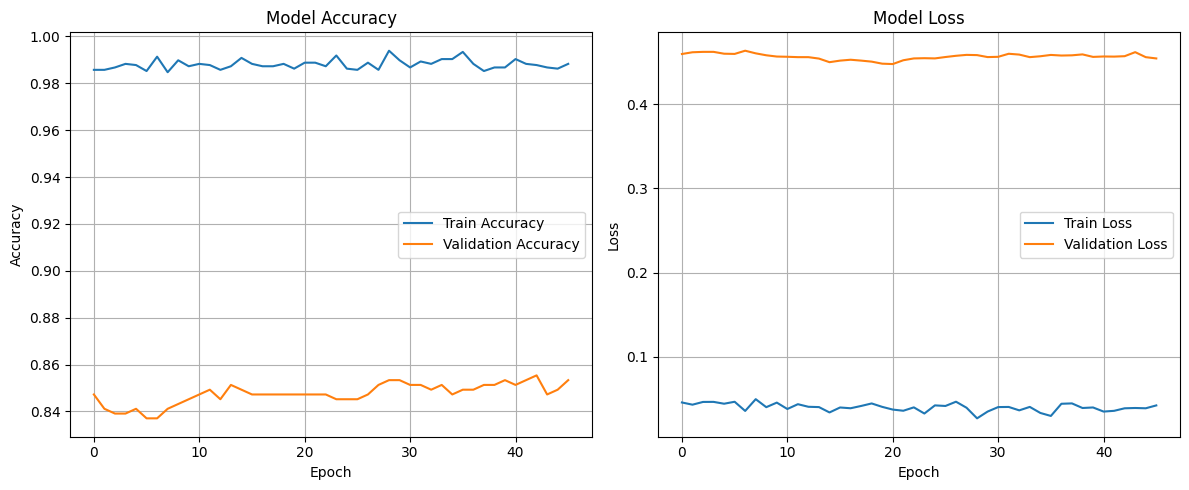

In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
import numpy as np # Ensure numpy is imported

print("\n--- Step 8: Model Training ---")

# Compute class weights
# y_encoded_train contains the integer labels for the training set
# You need the integer labels, not one-hot encoded, for compute_class_weight
# If y_train is one-hot, convert it back to integer labels first
y_encoded_train_labels = np.argmax(y_train, axis=1)

class_weights = class_weight.compute_class_weight(
    class_weight='balanced', # 'balanced' automatically adjusts weights inversely proportional to class frequencies
    classes=np.unique(y_encoded_train_labels),
    y=y_encoded_train_labels
)
class_weights_dict = dict(enumerate(class_weights)) # Map integer label to its weight

print(f"Computed class weights: {class_weights_dict}")
# You might manually inspect these. If neutral is heavily underrepresented, its weight will be higher.
# Even if balanced, 'balanced' weights can still help hard-to-classify classes.


history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping, reduce_lr],
                    class_weight=class_weights_dict, # ADD THIS LINE
                    verbose=1)

print("\n--- Step 8 Complete: Training finished. ---")

# Plot training history (rest of the code remains the same)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


--- Step 9: Model Evaluation ---
Validation Loss: 0.4480
Validation Overall Accuracy: 0.8473
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step

--- Confusion Matrix ---


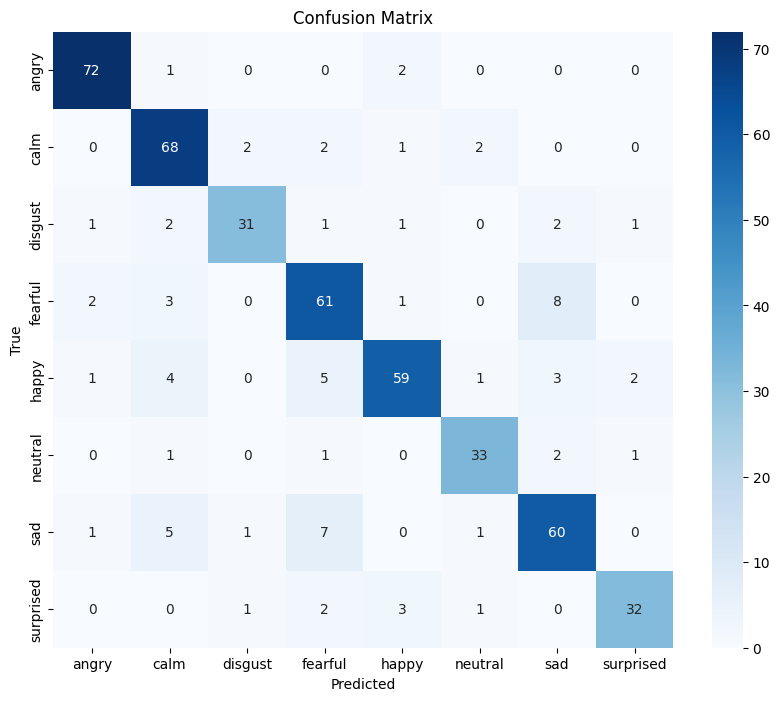


--- Classification Report ---
              precision    recall  f1-score   support

       angry       0.94      0.96      0.95        75
        calm       0.81      0.91      0.86        75
     disgust       0.89      0.79      0.84        39
     fearful       0.77      0.81      0.79        75
       happy       0.88      0.79      0.83        75
     neutral       0.87      0.87      0.87        38
         sad       0.80      0.80      0.80        75
   surprised       0.89      0.82      0.85        39

    accuracy                           0.85       491
   macro avg       0.86      0.84      0.85       491
weighted avg       0.85      0.85      0.85       491


Weighted F1 Score: 0.8470

--- Individual Class Accuracies ---
Accuracy for class 'angry': 0.9600
Accuracy for class 'calm': 0.9067
Accuracy for class 'disgust': 0.7949
Accuracy for class 'fearful': 0.8133
Accuracy for class 'happy': 0.7867
Accuracy for class 'neutral': 0.8684
Accuracy for class 'sad': 0.8000
Accura

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import matplotlib.pyplot as plt # Ensure plt is imported

print("\n--- Step 9: Model Evaluation ---")

# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Overall Accuracy: {val_accuracy:.4f}")

# Predictions for confusion matrix and F1 score
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

# Convert numerical labels back to emotion names for clarity
y_pred_labels = le.inverse_transform(y_pred)
y_true_labels = le.inverse_transform(y_true)

# --- Confusion Matrix ---
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true_labels, y_pred_labels, labels=le.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# --- Classification Report ---
print("\n--- Classification Report ---")
report = classification_report(y_true_labels, y_pred_labels, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_labels, y_pred_labels, target_names=le.classes_))

# --- Calculate F1 Score (weighted average for multi-class) ---
f1_weighted = f1_score(y_true_labels, y_pred_labels, average='weighted')
print(f"\nWeighted F1 Score: {f1_weighted:.4f}")

# --- Check individual class accuracies ---
print("\n--- Individual Class Accuracies ---")
class_accuracies = {}
for class_name in le.classes_:
    true_for_class = y_true_labels == class_name
    predicted_correctly_for_class = (y_pred_labels == class_name) & true_for_class
    total_samples_in_class = np.sum(true_for_class)

    if total_samples_in_class > 0:
        class_accuracy = np.sum(predicted_correctly_for_class) / total_samples_in_class
    else:
        class_accuracy = 0 # Handle cases where a class might have no samples
    class_accuracies[class_name] = class_accuracy
    print(f"Accuracy for class '{class_name}': {class_accuracy:.4f}")

print("\n--- Project Evaluation Criteria Check ---")
print(f"Overall Validation Accuracy: {val_accuracy * 100:.2f}% (Target: > 80%)")
print(f"Weighted F1 Score: {f1_weighted * 100:.2f}% (Target: > 80%)")

all_class_accuracy_met = True
for class_name, acc in class_accuracies.items():
    if acc < 0.75:
        all_class_accuracy_met = False
        print(f"FAIL: Class '{class_name}' accuracy ({acc * 100:.2f}%) is below 75%.")
    else:
        print(f"PASS: Class '{class_name}' accuracy ({acc * 100:.2f}%) is above 75%.")

if val_accuracy > 0.80 and f1_weighted > 0.80 and all_class_accuracy_met:
    print("\nCONGRATULATIONS! All project criteria on validation set are potentially met.")
else:
    print("\nKEEP WORKING! Not all project criteria on validation set are met yet.")
    print("Consider further tuning, data augmentation, or a more complex model.")

print("\n--- Step 9 Complete: Evaluation finished. ---")

In [ ]:
import os
import tensorflow as tf # Import tensorflow to use tf.keras.models.save_model
import pickle # For saving LabelEncoder

print("\n--- Step 10: Saving Trained Model and LabelEncoder ---")

# Define a specific directory in your Google Drive to save model artifacts
# Make sure this path exists and you have write permissions
model_artifacts_dir = "/content/drive/MyDrive/Emotion_Classifier_Deployment_Files"
os.makedirs(model_artifacts_dir, exist_ok=True) # Create the directory if it doesn't exist

# Define the full paths for your model and label encoder files
model_filepath = os.path.join(model_artifacts_dir, "emotion_classifier_model.h5")
label_encoder_filepath = os.path.join(model_artifacts_dir, "label_encoder.pkl")

# Save the Keras model
try:
    model.save(model_filepath)
    print(f"Model saved successfully to: {model_filepath}")
except Exception as e:
    print(f"ERROR: Could not save the Keras model. Please check permissions or disk space. Error: {e}")
    # If this fails, investigate your Google Drive space/permissions or restart Colab runtime.

# Save the LabelEncoder
try:
    with open(label_encoder_filepath, 'wb') as f:
        pickle.dump(le, f) # 'le' is your LabelEncoder instance from Cell 6
    print(f"LabelEncoder saved successfully to: {label_encoder_filepath}")
except Exception as e:
    print(f"ERROR: Could not save the LabelEncoder. Error: {e}")

print("\n--- Step 10 Complete: Model artifacts saved. ---")


--- Step 10: Saving Trained Model and LabelEncoder ---
Model saved successfully to: /content/drive/MyDrive/Emotion_Classifier_Deployment_Files/emotion_classifier_model.h5
LabelEncoder saved successfully to: /content/drive/MyDrive/Emotion_Classifier_Deployment_Files/label_encoder.pkl

--- Step 10 Complete: Model artifacts saved. ---
